In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
postings = pd.read_pickle("../step1_df.pk")

In [4]:
resume = open("../data/Liveproject Resume.txt").read()

In [27]:
resume_df = pd.DataFrame({"title": "resume", "body": resume, "bullets": ''}, index=[0])
comb_res_posting = postings.append(resume_df)

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import stop_words

In [19]:
tfidf = TfidfVectorizer(stop_words='english')

In [31]:
mat = tfidf.fit_transform(comb_res_posting["body"])
postings_mat = mat[:-1, :]
resume_mat = mat[-1, :]

In [35]:
from sklearn.metrics.pairwise import cosine_similarity
sims = cosine_similarity(postings_mat, resume_mat)

In [36]:
sorted_df = postings.copy()
sorted_df["cosine sim"] = sims

In [39]:
sorted_df.sort_values(by='cosine sim', ascending=False, inplace=True)

In [40]:
sorted_df.reset_index(inplace=True, drop=True)
sorted_df.head()

,title,body,bullets,cosine sim
0,Institutional Data and Research Analyst (6948U...,Institutional Data and Research Analyst (6948U...,(),0.143349
1,Data Science Health Innovation Fellow Job - BI...,Data Science Health Innovation Fellow Job - BI...,"(Demonstrated ability to propose, initiate, an...",0.125523
2,Machine Learning Postdoctoral Fellow - San Fra...,Machine Learning Postdoctoral Fellow - San Fra...,(Design and develop distributed machine learni...,0.121162
3,"Data Analyst (6256U) 1737 - 1737 - Berkeley, C...","Data Analyst (6256U) 1737 - 1737 - Berkeley, C...",(),0.117481
4,Senior Data Systems Analyst (0599U) - 1668 - 1...,Senior Data Systems Analyst (0599U) - 1668 - 1...,(),0.113083


Text(0, 0.5, 'cosine similarity')

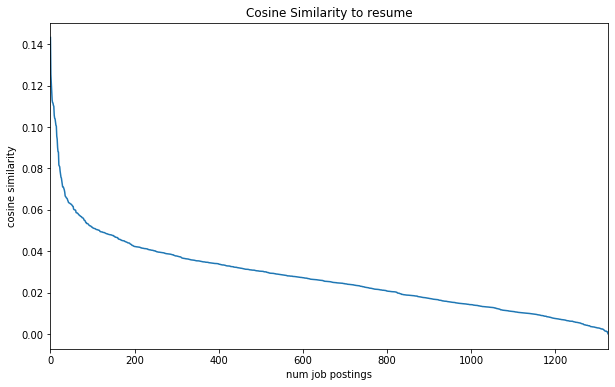

In [44]:
# Use matplot to see the shape of the similarities
plt.figure(figsize=(10,6))
sorted_df['cosine sim'].plot()
plt.title('Cosine Similarity to resume')
plt.xlabel('num job postings')
plt.ylabel('cosine similarity')

In [47]:
sorted_df.loc[:100].to_pickle("step2_df.pk")